In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [36]:
os.listdir()

['Customer_churn.ipynb', '.ipynb_checkpoints', 'Customer Churn.csv']

## Load the Dataset 

In [37]:
df = pd.read_csv('Customer Churn.csv')

In [38]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Replacing the blanks with 0 as tenure is 0 no total charges are recorded 

In [40]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [41]:
df.isnull().sum().sum()

np.int64(0)

In [42]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [43]:
df.duplicated().sum()

np.int64(0)

In [44]:
df.duplicated(['customerID']).sum()

np.int64(0)

In [45]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"


df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)   

### converted 0 and 1 values of Senior Citizen  into yes and no make it easier to understand

In [46]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:

sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams["axes.facecolor"] = "#f7f7f7"
plt.rcParams["figure.facecolor"] = "#f7f7f7"

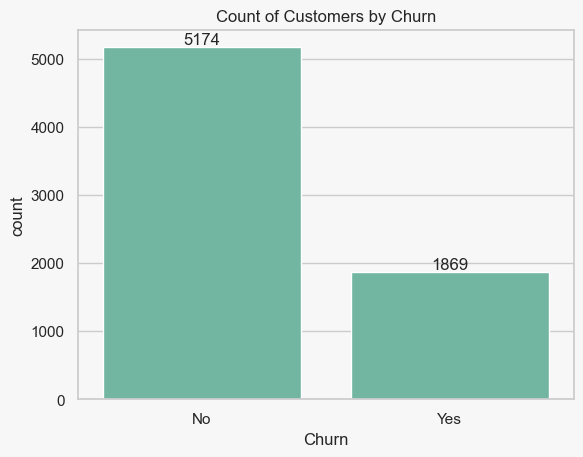

In [47]:
ax = sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn",fontsize=12)
plt.show()

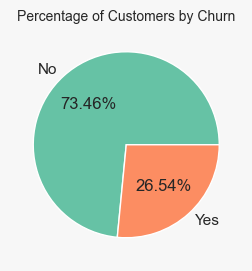

In [48]:
plt.figure(figsize=(3,4))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'],labels= gb.index,autopct="%1.2f%%")
plt.title("Percentage of Customers by Churn",fontsize=10)
plt.show()

### From the give pie chart we can conclude that 26.54% of customer is churned out.
### Now Lets Explore the Reason Behind it.

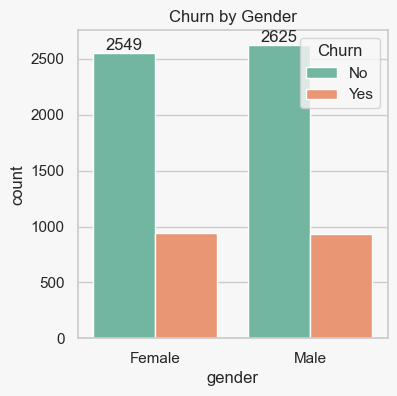

In [49]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='gender',data=df,hue='Churn')
plt.title("Churn by Gender")
plt.bar_label(ax.containers[0])
plt.show()

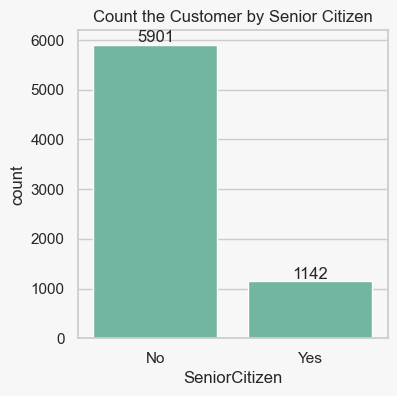

In [50]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='SeniorCitizen',data=df)
plt.title("Count the Customer by Senior Citizen")
plt.bar_label(ax.containers[0])
plt.show()

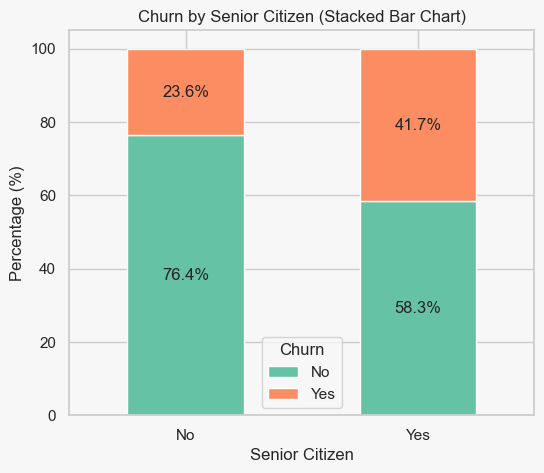

In [51]:
total_count = (
    df.groupby('SeniorCitizen')['Churn']
      .value_counts(normalize=True)
      .unstack(fill_value=0) * 100
)

fig, ax = plt.subplots(figsize=(6,5))
total_count.plot(kind='bar', stacked=True, ax=ax)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')

plt.title("Churn by Senior Citizen (Stacked Bar Chart)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()


### Comparative a greated percentage of people in senior citizen category have churned 

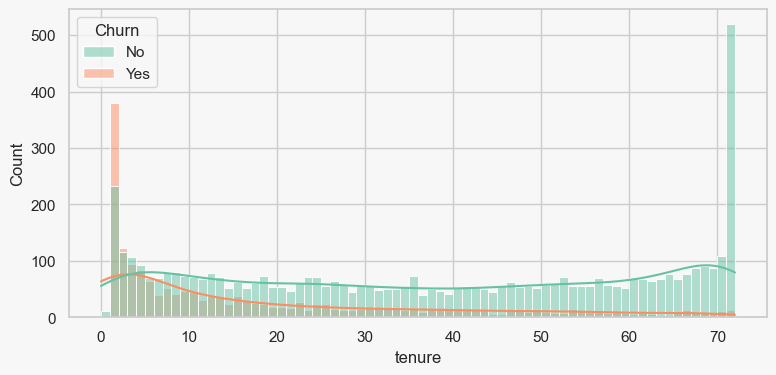

In [52]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=72,hue='Churn',kde=True)
plt.show()

### People who have use our services for long time have stayed people who have used over service for 1 months have churns 

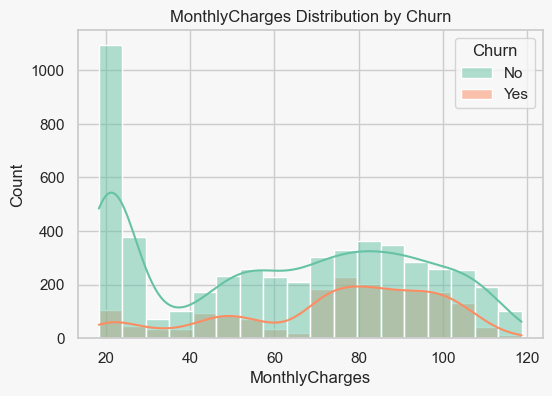

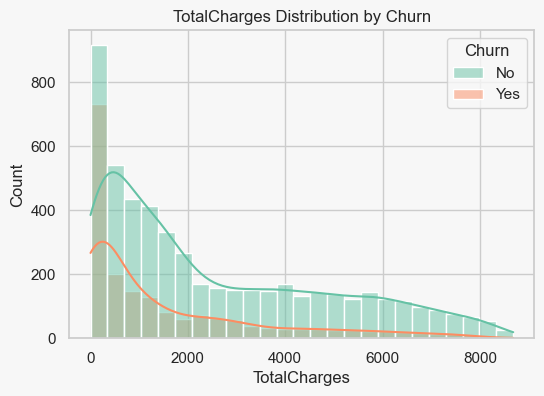

In [53]:
for col in ['MonthlyCharges', 'TotalCharges']:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True)
    plt.title(f"{col} Distribution by Churn")
    plt.show()

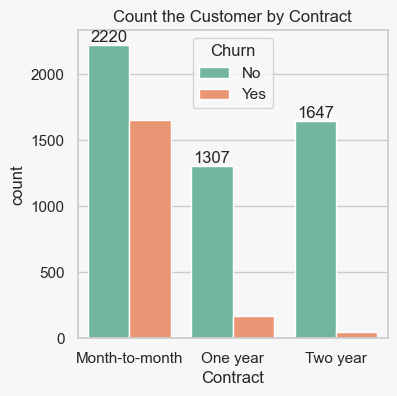

In [54]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Contract',hue='Churn',data=df)
plt.title("Count the Customer by Contract")
plt.bar_label(ax.containers[0])
plt.show()

### people who have month to month have contract are likely to churn then from those who have 1 or 2 years Contract

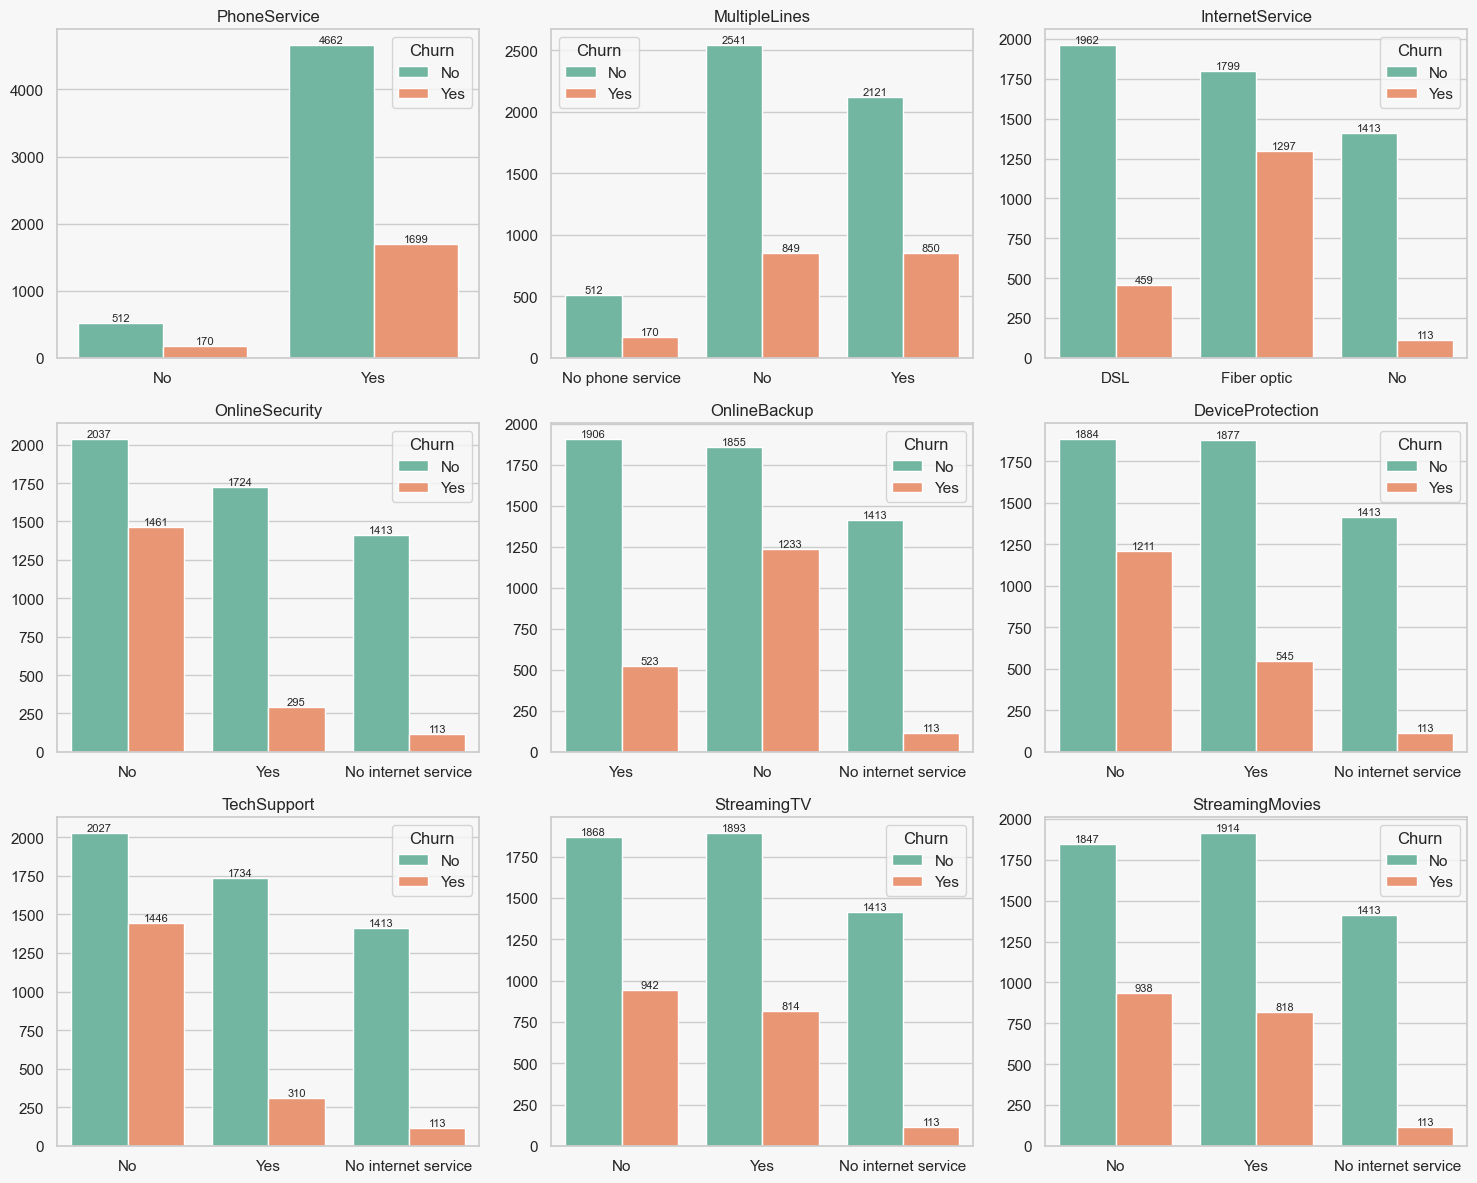

In [55]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create subplots (3 columns per row)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    sns.countplot(x=col, hue='Churn', data=df, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # Add labels on each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=8)

# Hide any unused subplot space
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


From the plots, it’s clear that churn rates vary strongly by service type.
Customers lacking extra services like OnlineSecurity, TechSupport, or DeviceProtection have noticeably higher churn.
Those with Fiber optic internet also churn more compared to DSL users.
Overall, retention seems stronger among customers who have bundled or multiple services.

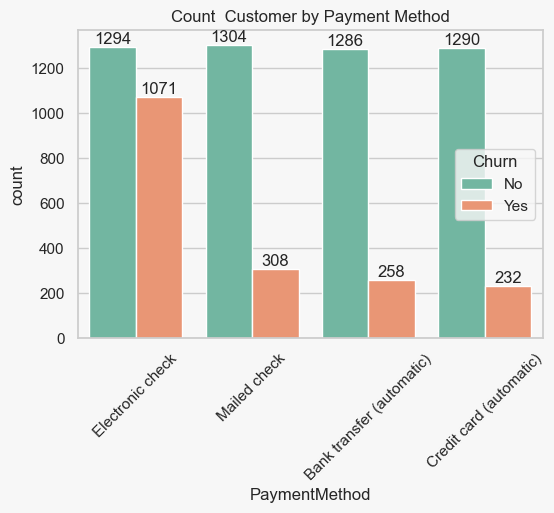

In [56]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='PaymentMethod',hue='Churn',data=df)
plt.title("Count  Customer by Payment Method")
plt.xticks(rotation=45)
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.show()

###  Customer is likely to churn when he use Electronic check as a payment method

In [57]:
# ...existing code...
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'PaymentMethod']
for col in cat_cols:
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().get('Yes', 0) * 100
    print(f"Churn rate by {col}:\n{churn_rate}\n")
# ...existing code...

Churn rate by gender:
gender
Female    26.920872
Male      26.160338
Name: Yes, dtype: float64

Churn rate by SeniorCitizen:
SeniorCitizen
No     23.606168
Yes    41.681261
Name: Yes, dtype: float64

Churn rate by Partner:
Partner
No     32.957979
Yes    19.664903
Name: Yes, dtype: float64

Churn rate by Dependents:
Dependents
No     31.279140
Yes    15.450237
Name: Yes, dtype: float64

Churn rate by Contract:
Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Yes, dtype: float64

Churn rate by PaymentMethod:
PaymentMethod
Bank transfer (automatic)    16.709845
Credit card (automatic)      15.243101
Electronic check             45.285412
Mailed check                 19.106700
Name: Yes, dtype: float64



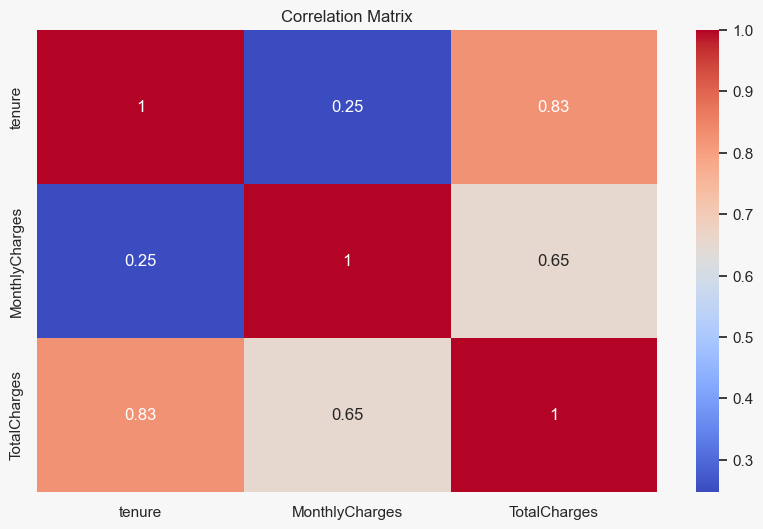

In [58]:

# ...existing code...
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
# ...existing code...


### Insight: Churn Count Chart
The majority of customers have not churned, but a significant minority have. This highlights churn as a notable business issue.
### Insight: Churn Percentage Pie Chart
About 26.5% of customers have churned, indicating a substantial churn rate that warrants further investigation.
### Insight: Churn by Gender
Churn rates are similar across genders, suggesting gender is not a strong predictor of churn.
### Insight: Senior Citizen Churn
Senior citizens have a higher churn rate compared to non-senior customers, indicating age group is a relevant factor.
### Insight: Tenure Distribution by Churn
Customers with shorter tenure are more likely to churn, while long-term customers tend to stay.
### Insight: MonthlyCharges and TotalCharges by Churn
Customers with higher monthly charges are more likely to churn, while total charges are lower for churned customers due to shorter tenure.
### Insight: Contract Type by Churn
Month-to-month contract customers have the highest churn rate, while those with longer contracts are less likely to churn.
### Insight: Services by Churn
Customers lacking extra services (e.g., OnlineSecurity, TechSupport) have higher churn rates. Fiber optic internet users also churn more than DSL users.
### Insight: Payment Method by Churn
Customers using Electronic Check as a payment method are more likely to churn compared to other payment methods.